In [1]:
%run util.py

In [2]:
# generate our own data
# %run util.py
printTime()
seed = np.random.randint(1000) 
seed = 932 #(496,type 3)
print ("seed: ",seed)
np.random.seed(seed)
(X, y ,true_w,true_b,poly) = generateData((5000,100),50,eta=0.25,noise_type=3,split=False)
# (X, y ,true_w,true_b) = generateData((5000,100),50,eta=0.25,noise_type=2,split=False)
large_w_ind = np.argsort(-true_w)



Latest excution of this block: Thu Oct 17 09:46:54 2024
seed:  932
generated data of shape:  (5000, 100) noisy data 1219 , 1 vs -1 : 1894 3106


In [3]:
def eachFold(X_train,y_train,X_test,y_test,k,theta,algo='adaboost',blackbox = SVC(), verbose=1):
    # train a full classifier using 'algo' and 100 decision stumps
    if (algo=='roboost'):
        f = roBoost(X_train,y_train,100,0.3,verbose = 1,r_lb=0.03)
    else:
        f = adaBoost(X_train,y_train,100)
    
    # sample k out of the full classifier abf
    beta =0.99/k
    g = deRandomizeSampleHypotheses(f,k,X_train,y_train,beta,verbose = 0)
    
    # plot_margin_distribution(X_test,y_test,g,theta,name='g')
    error_cover_margin = compute_error_cover_margin(X_train,y_train,X_test,y_test,g,k,theta) # (5,k+1)

    #blackbox = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,25,5), random_state=1)
    blackbox.fit(X_train, y_train)
    y_pred_bb = blackbox.predict(X_test) 
    error_bb = 1 - metrics.accuracy_score(y_test, y_pred_bb)
    
    stats = []
    (ind,c) = cover(g,X_test,theta)
    e = marginError(X_test[ind],y_test[ind],g,0)
    error_f = marginError(X_test,y_test,f)
    stats = [c,e,error_bb,error_f]

    if algo=='adaboost':
        theta_c = 1.1*theta
        theta_b = 0
        c_theta = 1 - marginError(X_train,y_train,f,theta_c) #- np.exp(-k/8.0*(theta_c-theta)**2)
        b_theta = (marginError(X_train,y_train,f,theta_b))/c_theta
    else:
        nu = 0.3
        rho = 1.0
        theta_b = 0
        c_theta = 1 - nu #- np.exp(-k/32.0)
        b_theta = (marginError(X_train,y_train,f,theta_b))/c_theta
    stats.append(c_theta)
    stats.append(b_theta)
    
    if verbose>0:
        printClassifierFeatures(g,print_weights=False)
        print("compare to top feature in true w")
        print(large_w_ind[:k])
        # print(true_w[large_w_ind][:k])
        
        # print ("P_S[y * g(x) < 2theta]",marginError(X_train,y_train,g,2*theta))

        print ("P_S[y * f(x) < 0] = ",marginError(X_train,y_train,f))
        print ("P_S[y * g(x) < 0] = ",marginError(X_train,y_train,g))
        print ("P_D[y * f(x) < 0] = ",marginError(X_test,y_test,f))
        print ("P_D[y * g(x) < 0] = ",marginError(X_test,y_test,g))
        print("coverage at theta  = ", theta, "is", c, " = % of test data st. |g(x)| >= theta")
        print ("P_D[y * g(x) < 0 | cover] = ", e)

        
        # theta_c = 1.1*theta
        # theta_b = 0#-theta/5.0
        # print ("P_S[y * f(x) < theta_c] = ",marginError(X_train,y_train,f,theta_c))
        
        print ("tighter c_theta: 1-P_S[y * f(x) < theta_c] = ",c_theta)
        print("tighter b_theta: ",b_theta)
        
           

    return (error_cover_margin,stats)

Latest excution of this block: Thu Oct 17 09:47:03 2024
Sparsify adaboost to  5 base learners:
Fold 0:
----------------- classifier summary -----------------
[32, 32, 20, 44, 21]
compare to top feature in true w
[32 44 20 10 21]
P_S[y * f(x) < 0] =  0.20506666666666667
P_S[y * g(x) < 0] =  0.30266666666666664
P_D[y * f(x) < 0] =  0.2328
P_D[y * g(x) < 0] =  0.3184
coverage at theta  =  0.4 is 0.3816  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.16561844863731656
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.006133333333333324
tighter b_theta:  33.434782608695706
Fold 1:
----------------- classifier summary -----------------
[32, 32, 20, 44, 10]
compare to top feature in true w
[32 44 20 10 21]
P_S[y * f(x) < 0] =  0.21973333333333334
P_S[y * g(x) < 0] =  0.31066666666666665
P_D[y * f(x) < 0] =  0.2288
P_D[y * g(x) < 0] =  0.3008
coverage at theta  =  0.4 is 0.3808  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.14285714285714285
tighter c_t

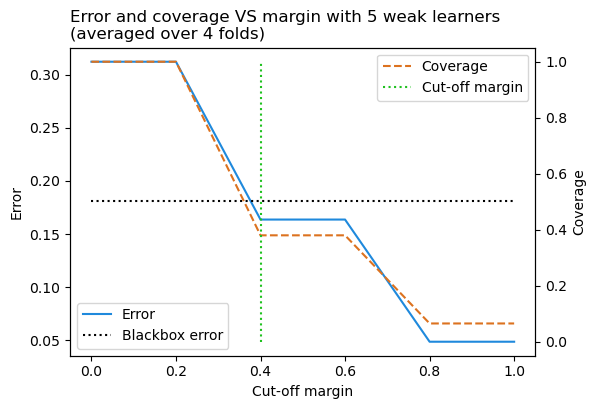

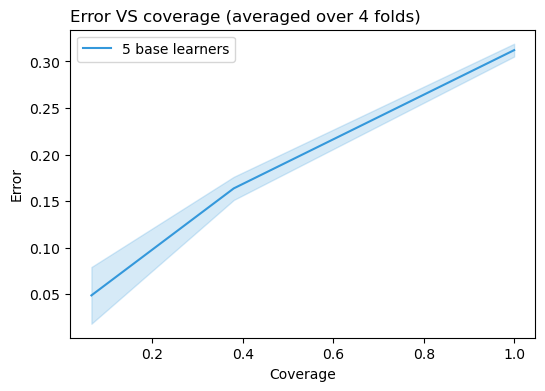

Sparsify adaboost to 15 base learners:
Fold 0:
----------------- classifier summary -----------------
[32, 44, 32, 20, 10, 21, 35, 8, 48, 38, 47, 14, 5, 25, 2]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13]
P_S[y * f(x) < 0] =  0.20506666666666667
P_S[y * g(x) < 0] =  0.2424
P_D[y * f(x) < 0] =  0.2328
P_D[y * g(x) < 0] =  0.2728
coverage at theta  =  0.13333333333333333 is 0.6056  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.17437252311756934
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.37226666666666663
tighter b_theta:  0.5508595988538683
Fold 1:
----------------- classifier summary -----------------
[32, 20, 44, 10, 21, 32, 8, 35, 48, 38, 5, 47, 14, 25, 26]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13]
P_S[y * f(x) < 0] =  0.21973333333333334
P_S[y * g(x) < 0] =  0.24773333333333333
P_D[y * f(x) < 0] =  0.2288
P_D[y * g(x) < 0] =  0.2544
coverage at theta  =  0.13333333333333333 is 0.6008  

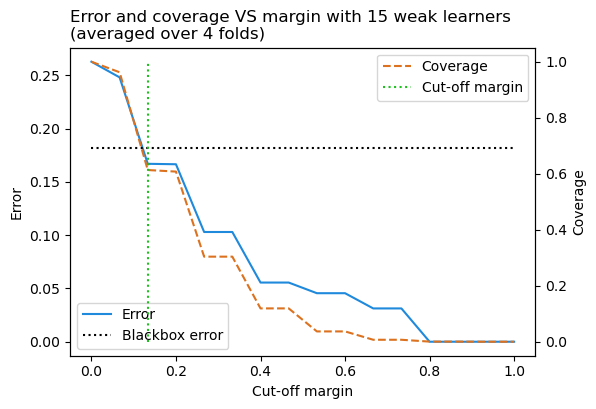

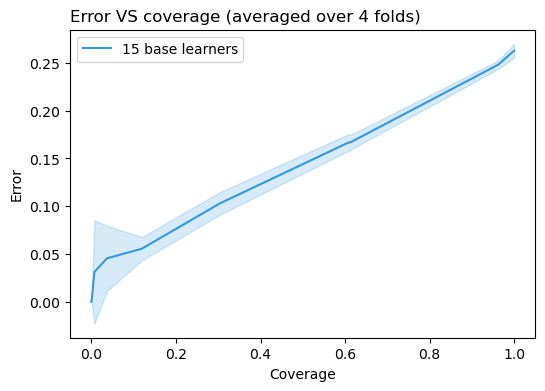

Sparsify adaboost to 25 base learners:
Fold 0:
----------------- classifier summary -----------------
[32, 44, 20, 10, 21, 35, 8, 32, 48, 38, 47, 32, 44, 14, 5, 29, 13, 10, 25, 0, 43, 37, 9, 22, 20]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13  7 26 34 15  2 22  9 29 45
 33]
P_S[y * f(x) < 0] =  0.20506666666666667
P_S[y * g(x) < 0] =  0.21013333333333334
P_D[y * f(x) < 0] =  0.2328
P_D[y * g(x) < 0] =  0.2376
coverage at theta  =  0.08 is 0.752  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.1776595744680851
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.5624
tighter b_theta:  0.36462778568041726
Fold 1:
----------------- classifier summary -----------------
[32, 44, 20, 10, 21, 35, 8, 48, 38, 47, 32, 32, 5, 14, 44, 10, 25, 16, 13, 43, 37, 0, 34, 33, 26]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13  7 26 34 15  2 22  9 29 45
 33]
P_S[y * f(x) < 0] =  0.21973333333333334
P_S[y * g(x) < 0] =  0.216

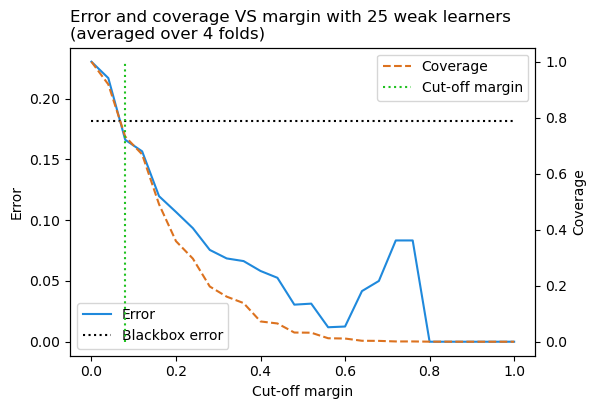

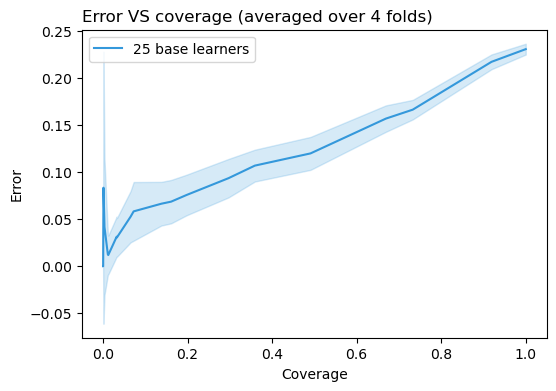

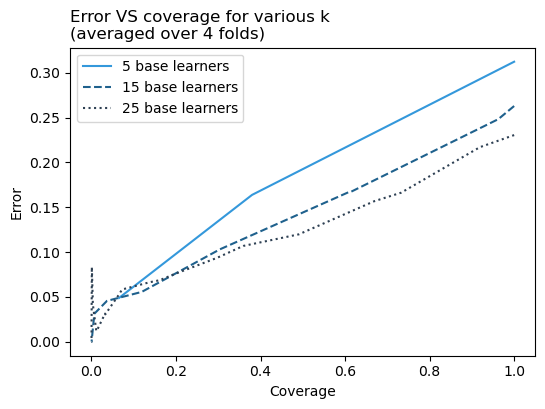

In [4]:
%run util.py
printTime()
n_folds = 4
kf = KFold(n_splits= n_folds,shuffle=True,random_state=42)

k_list = [5,15,25] #[5,11,17] [5,15,25]
theta_list = [2.0/5,2.0/15,2.0/25]
# k_list = [15]
# theta_list = [2.0/15]
bb_params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'}
# bb_params_mlp = {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100, 75, 50,2), 'learning_rate': 'constant', 'solver': 'sgd','random_state':1}
compare_by_k = []

df = pd.DataFrame([], columns= ['k','margin','train_error_mean','train_error_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_cover_mean','test_cover_std'])

for i in range(len(k_list)):
    k = k_list[i]
    theta = theta_list[i]
    error_cover_margin_k = [] # list of data for this k, len() is n_folds
    print("Sparsify adaboost to {0:2d} base learners:".format(k))
    stats_arr = np.zeros((n_folds,4+2)) #stats cols: c,e,error_bb,error_f, c_theta, b_theta
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {j}:")
        X_train = X[train_index,:]
        y_train = y[train_index]
        X_test = X[test_index,:]
        y_test = y[test_index]
        
        # blackbox = MLPClassifier(**bb_params_mlp)
        blackbox = SVC(**bb_params)
        #(5,k)
        error_cover_margin_fold,stats = eachFold(X_train,y_train,X_test,y_test,k,theta,'adaboost',blackbox,verbose=1) 
        
        error_cover_margin_k.append(error_cover_margin_fold)
        stats_arr[j] = np.array(stats)

    print("------------------------------ {0:2d} base learners cut-off margin {2:3f} averaged over {1:2d} folds ------------------------------".format(k,n_folds,theta))
    stats_mean = np.mean(stats_arr,axis=0)
    stats_std = np.std(stats_arr,axis=0)
    print ("coverage: {0:.3f} \pm {1:.3f}\t error: {2:.3f} \pm {3:.3f}\t blackbox (overall): {4:.3f} \pm {5:.3f}\t f (overall): {6:.3f} \pm {7:.3f}".format(stats_mean[0],stats_std[0],stats_mean[1],stats_std[1],stats_mean[2],stats_std[2],stats_mean[3],stats_std[3]))
    print ("c_theta: {0:.3f} \pm {1:.3f}\t b_theta: {2:.3f} \pm {3:.3f}".format(stats_mean[4],stats_std[4],stats_mean[5],stats_std[5]))

    # aggregate data for this k, append to df
    error_cover_margin_k = np.array(error_cover_margin_k) # (n_folds, 5, k)
    k_m_ee_cc = np.zeros((error_cover_margin_k.shape[2],10))
    k_m_ee_cc[:,0] = k
    k_m_ee_cc[:,1] = error_cover_margin_k[0,4,:] # margin values
    
    k_m_ee_cc[:,2] = np.mean(error_cover_margin_k[:,0,:],axis=0) # train error mean across folds
    k_m_ee_cc[:,3] = np.std(error_cover_margin_k[:,0,:],axis=0)  # train error std across folds
    k_m_ee_cc[:,4] = np.mean(error_cover_margin_k[:,1,:],axis=0) # train cover mean across folds
    k_m_ee_cc[:,5] = np.std(error_cover_margin_k[:,1,:],axis=0)  # train cover std across folds
    
    k_m_ee_cc[:,6] = np.mean(error_cover_margin_k[:,2,:],axis=0) # test error mean across folds
    k_m_ee_cc[:,7] = np.std(error_cover_margin_k[:,2,:],axis=0)  # test error std across folds
    k_m_ee_cc[:,8] = np.mean(error_cover_margin_k[:,3,:],axis=0) # test cover mean across folds
    k_m_ee_cc[:,9] = np.std(error_cover_margin_k[:,3,:],axis=0)  # test cover std across folds
    df_k = pd.DataFrame(k_m_ee_cc, columns= ['k','margin','train_error_mean','train_error_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_cover_mean','test_cover_std'])
    df = pd.concat([df, df_k], ignore_index=True)

    compare_by_k.append(k_m_ee_cc)
    
    plot_error_cover_by_margin(k_m_ee_cc,ref_theta=theta,ref_error=stats_arr[:,2],title="Error and coverage VS margin with "+str(k)+" weak learners \n(averaged over "+str(n_folds)+" folds)",file_name='ab_error_cover_margin_'+str(k))
    plot_error_by_cover([k_m_ee_cc],labels=[str(k)+' base learners'],title="Error VS coverage (averaged over "+str(n_folds)+" folds)",file_name='ab_error_cover_'+str(k))
        
df['k'] = df['k'].astype(int)
df.to_csv('output/'+"ab_train_test_stats"+'.csv', index=False) 
plot_error_by_cover(compare_by_k,labels=[str(k)+' base learners' for k in k_list],band=False,title="Error VS coverage for various k \n(averaged over "+str(n_folds)+" folds)", file_name='ab_error_cover_multi')
# ab = error_list_k # save the data from adaBoost for comparison against roboost

Latest excution of this block: Sun Sep 29 12:55:40 2024
Sparsify roboost to  5 base learners:
Fold 0:
final r_opt 0.03
Time spent in roBoost: 1.43 seconds
----------------- classifier summary -----------------
[32, 32, 20, 20, 20]
compare to top feature in true w
[32 44 20 10 21]
P_S[y * f(x) < 0] =  0.248
P_S[y * g(x) < 0] =  0.32853333333333334
P_D[y * f(x) < 0] =  0.26
P_D[y * g(x) < 0] =  0.336
coverage at theta  =  0.4 is 0.2592  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.2191358024691358
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.7
tighter b_theta:  0.3542857142857143
Fold 1:
final r_opt 0.03
Time spent in roBoost: 1.32 seconds
----------------- classifier summary -----------------
[32, 32, 20, 20, 20]
compare to top feature in true w
[32 44 20 10 21]
P_S[y * f(x) < 0] =  0.23466666666666666
P_S[y * g(x) < 0] =  0.33413333333333334
P_D[y * f(x) < 0] =  0.2336
P_D[y * g(x) < 0] =  0.3192
coverage at theta  =  0.4 is 0.2304  = % of test data st. |g(x)|

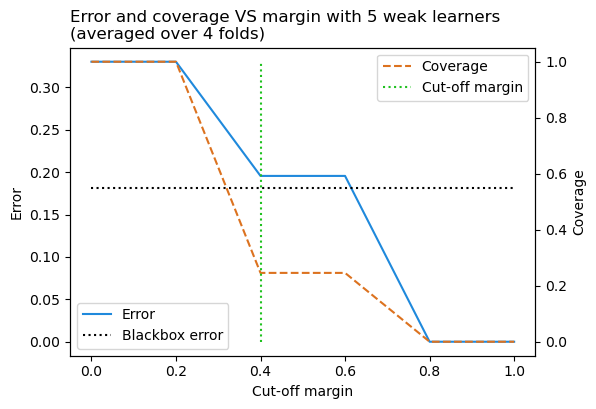

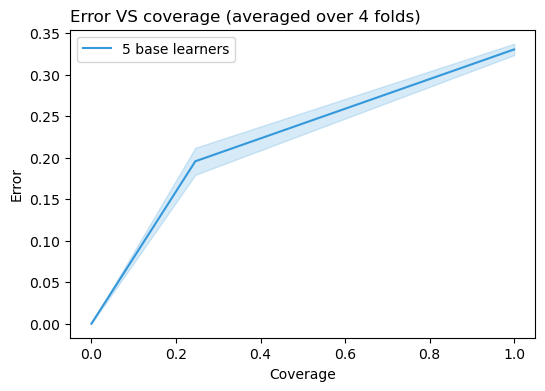

Sparsify roboost to 15 base learners:
Fold 0:
final r_opt 0.03
Time spent in roBoost: 1.40 seconds
----------------- classifier summary -----------------
[32, 32, 44, 20, 10, 21, 35, 8, 48, 38, 47, 14, 5, 25, 2]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13]
P_S[y * f(x) < 0] =  0.248
P_S[y * g(x) < 0] =  0.2424
P_D[y * f(x) < 0] =  0.26
P_D[y * g(x) < 0] =  0.2728
coverage at theta  =  0.13333333333333333 is 0.6056  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.17437252311756934
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.7
tighter b_theta:  0.3542857142857143
Fold 1:
final r_opt 0.03
Time spent in roBoost: 1.30 seconds
----------------- classifier summary -----------------
[32, 20, 32, 10, 44, 21, 35, 8, 48, 47, 38, 14, 5, 25, 26]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13]
P_S[y * f(x) < 0] =  0.23466666666666666
P_S[y * g(x) < 0] =  0.24773333333333333
P_D[y * f(x) < 0] =  0.2336
P_D[y * 

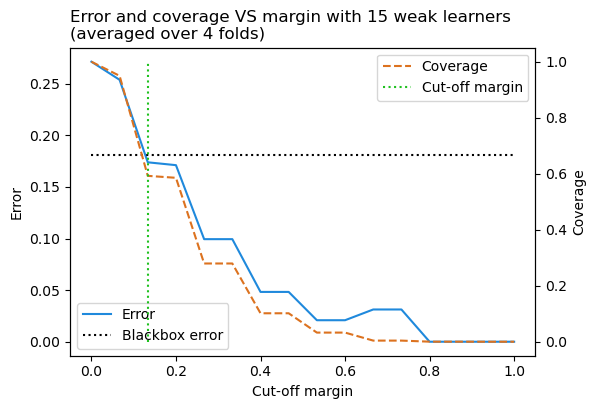

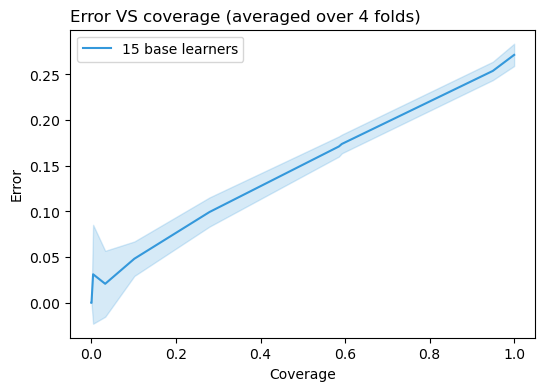

Sparsify roboost to 25 base learners:
Fold 0:
final r_opt 0.03
Time spent in roBoost: 1.35 seconds
----------------- classifier summary -----------------
[32, 32, 44, 20, 32, 10, 21, 35, 48, 8, 44, 38, 47, 20, 14, 5, 10, 13, 43, 25, 0, 37, 29, 9, 16]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13  7 26 34 15  2 22  9 29 45
 33]
P_S[y * f(x) < 0] =  0.248
P_S[y * g(x) < 0] =  0.2096
P_D[y * f(x) < 0] =  0.26
P_D[y * g(x) < 0] =  0.232
coverage at theta  =  0.08 is 0.7552  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.1843220338983051
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.7
tighter b_theta:  0.3542857142857143
Fold 1:
final r_opt 0.03
Time spent in roBoost: 1.35 seconds
----------------- classifier summary -----------------
[20, 32, 32, 10, 44, 21, 20, 35, 8, 48, 32, 47, 10, 38, 43, 14, 44, 5, 3, 13, 16, 9, 26, 0, 2]
compare to top feature in true w
[32 44 20 10 21 48 35 47 43 38  8 14  0 25 13  7 26 34 15  2 22  9 29 45
 33

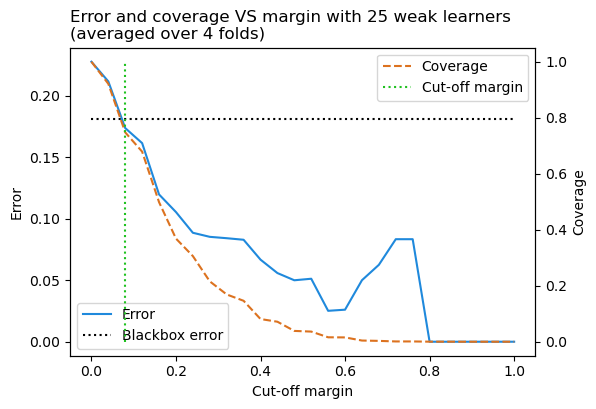

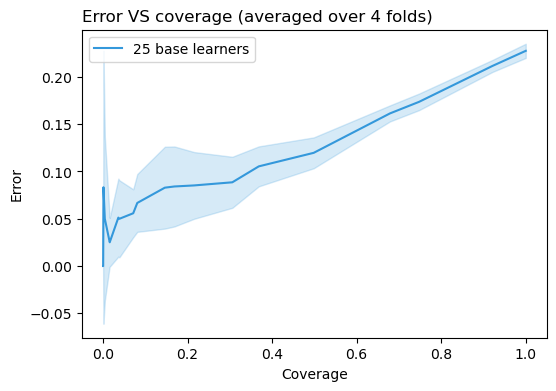

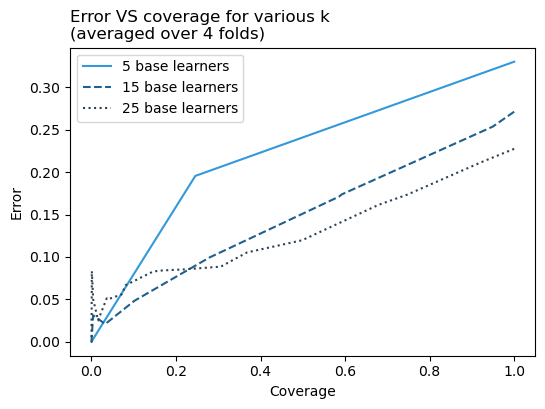

In [58]:
printTime()
n_folds = 4
kf = KFold(n_splits= n_folds,shuffle=True,random_state=42)

k_list = [5,15,25] #[5,11,17] [5,15,25]
theta_list = [2.0/5,2.0/15,2.0/25]
bb_params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'}
compare_by_k = []
df = pd.DataFrame([], columns= ['k','margin','train_error_mean','train_error_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_cover_mean','test_cover_std'])
for i in range(len(k_list)):
    k = k_list[i]
    theta = theta_list[i]

    error_cover_margin_k = [] # list of data for this k, len() is n_folds
    print("Sparsify roboost to {0:2d} base learners:".format(k))
    stats_arr = np.zeros((n_folds,4+2)) #stats cols: c,e,error_bb,error_f, c_theta, b_theta
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {j}:")
        X_train = X[train_index,:]
        y_train = y[train_index]
        X_test = X[test_index,:]
        y_test = y[test_index]
        
        # blackbox = MLPClassifier(**bb_params_mlp)
        blackbox = SVC(**bb_params)
        #(3,k)
        error_cover_margin_fold,stats = eachFold(X_train,y_train,X_test,y_test,k,theta,'roboost',blackbox,verbose=1) 
        
        error_cover_margin_k.append(error_cover_margin_fold)
        stats_arr[j] = np.array(stats)
    
    print("------------------------------ {0:2d} base learners cut-off margin {2:3f} averaged over {1:2d} folds ------------------------------".format(k,n_folds,theta))
    stats_mean = np.mean(stats_arr,axis=0)
    stats_std = np.std(stats_arr,axis=0)
    print ("coverage: {0:.3f} \pm {1:.3f}\t error: {2:.3f} \pm {3:.3f}\t blackbox (overall): {4:.3f} \pm {5:.3f}\t f (overall): {6:.3f} \pm {7:.3f}".format(stats_mean[0],stats_std[0],stats_mean[1],stats_std[1],stats_mean[2],stats_std[2],stats_mean[3],stats_std[3]))
    print ("c_theta: {0:.3f} \pm {1:.3f}\t b_theta: {2:.3f} \pm {3:.3f}".format(stats_mean[4],stats_std[4],stats_mean[5],stats_std[5]))
    
        # aggregate data for this k, append to df
    # aggregate data for this k, append to df
    error_cover_margin_k = np.array(error_cover_margin_k) # (n_folds, 5, k)
    k_m_ee_cc = np.zeros((error_cover_margin_k.shape[2],10))
    k_m_ee_cc[:,0] = k
    k_m_ee_cc[:,1] = error_cover_margin_k[0,4,:] # margin values
    
    k_m_ee_cc[:,2] = np.mean(error_cover_margin_k[:,0,:],axis=0) # train error mean across folds
    k_m_ee_cc[:,3] = np.std(error_cover_margin_k[:,0,:],axis=0)  # train error std across folds
    k_m_ee_cc[:,4] = np.mean(error_cover_margin_k[:,1,:],axis=0) # train cover mean across folds
    k_m_ee_cc[:,5] = np.std(error_cover_margin_k[:,1,:],axis=0)  # train cover std across folds
    
    k_m_ee_cc[:,6] = np.mean(error_cover_margin_k[:,2,:],axis=0) # test error mean across folds
    k_m_ee_cc[:,7] = np.std(error_cover_margin_k[:,2,:],axis=0)  # test error std across folds
    k_m_ee_cc[:,8] = np.mean(error_cover_margin_k[:,3,:],axis=0) # test cover mean across folds
    k_m_ee_cc[:,9] = np.std(error_cover_margin_k[:,3,:],axis=0)  # test cover std across folds
    df_k = pd.DataFrame(k_m_ee_cc, columns= ['k','margin','train_error_mean','train_error_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_cover_mean','test_cover_std'])
    df = pd.concat([df, df_k], ignore_index=True)

    compare_by_k.append(k_m_ee_cc)
    
    plot_error_cover_by_margin(k_m_ee_cc,ref_theta=theta,ref_error=stats_arr[:,2],title="Error and coverage VS margin with "+str(k)+" weak learners \n(averaged over "+str(n_folds)+" folds)",file_name='rb_error_cover_margin_'+str(k))
    plot_error_by_cover([k_m_ee_cc],labels=[str(k)+' base learners'],title="Error VS coverage (averaged over "+str(n_folds)+" folds)",file_name='rb_error_cover_'+str(k))
        
df['k'] = df['k'].astype(int)
df.to_csv('output/'+"rb_train_test_stats"+'.csv', index=False) 
plot_error_by_cover(compare_by_k,labels=[str(k)+' base learners' for k in k_list],band=False,title="Error VS coverage for various k \n(averaged over "+str(n_folds)+" folds)", file_name='rb_error_cover_multi')
# rb = error_list_k # save the data from roBoost for comparison against adaBoost